Importing required libraries

In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


Reading CSV file

In [74]:
data=pd.read_csv('/content/drive/MyDrive/ML project/Medical Price Dataset.csv')

In [75]:
data.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

Data Visualisation

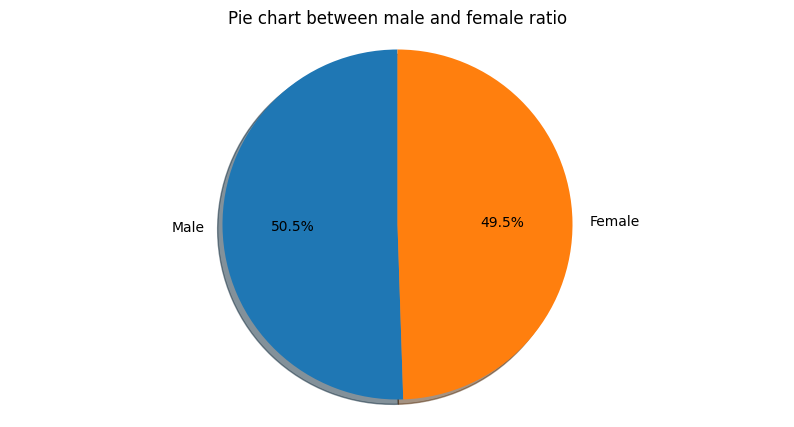

In [76]:
labels = 'Male', 'Female' #labelling
explode = (0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(data.sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90) 
ax1.axis('equal')
plt.title('Pie chart between male and female ratio')
plt.show()

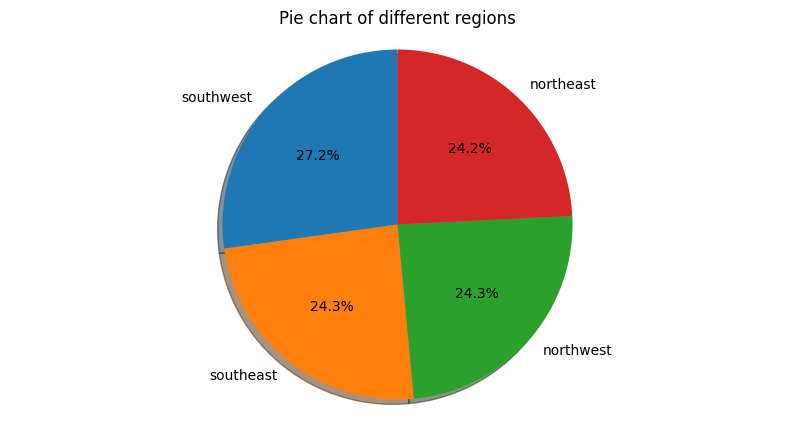

In [77]:
labels = 'southwest', 'southeast', 'northwest', 'northeast' #labelling
#explode = (0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(data.region.value_counts(), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90) 
ax1.axis('equal')
plt.title('Pie chart of different regions')
plt.show()

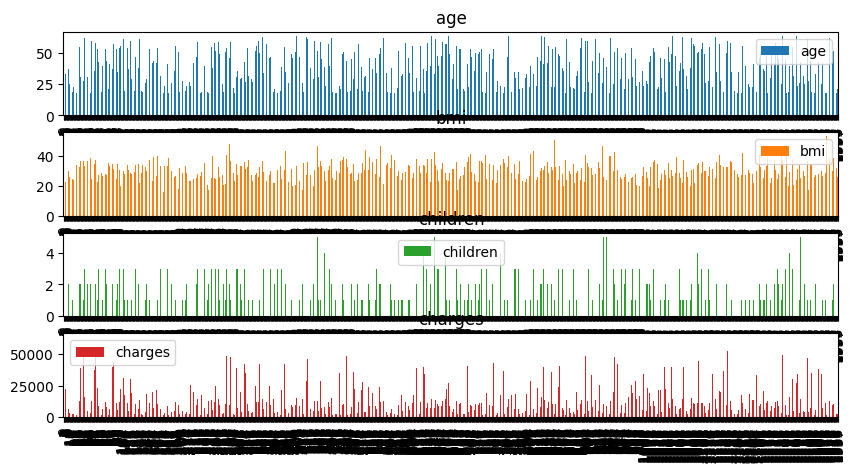

In [78]:
plt.rcParams["figure.figsize"] = (10,5)
data.plot(kind='bar', subplots= True, sharex= False, sharey= False)
plt.show() 

Text(0.5, 1.0, 'Region vs Charges')

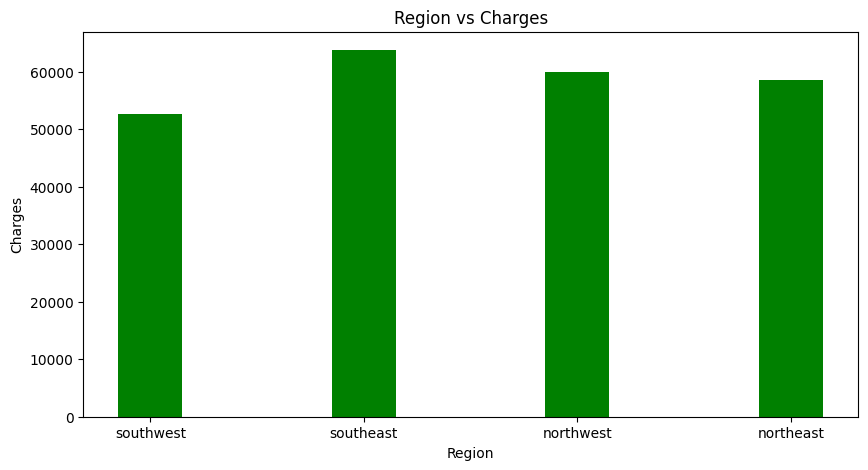

In [79]:
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(data['region'],data['charges'],color ='green',width = 0.3)
plt.xlabel("Region")
plt.ylabel("Charges")
plt.title("Region vs Charges")

Text(0.5, 1.0, 'Region vs Age')

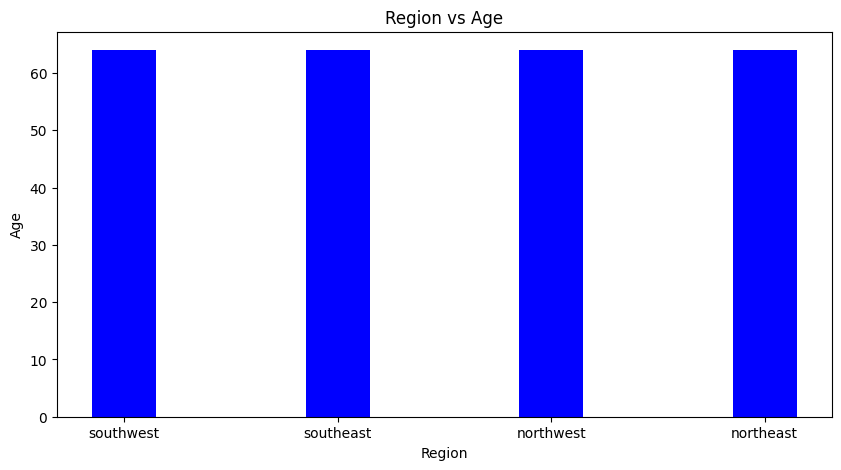

In [80]:
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(data['region'],data['age'],color ='blue',width = 0.3)
plt.xlabel("Region")
plt.ylabel("Age")
plt.title("Region vs Age")

Text(0.5, 1.0, 'Age vs Charges')

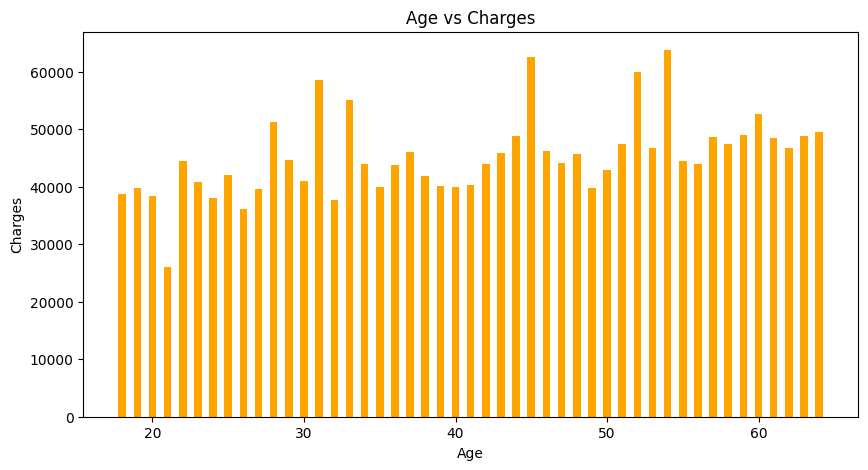

In [81]:
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(data['age'],data['charges'],color ='orange',width = 0.5)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Charges")

**Data Preprocessing**

Converting categorical data into discrete numbers

In [82]:
data['sex']=data['sex'].map({'female':1,'male':0})    
data['region']=data['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})   
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data1=data[['smoker','age','sex','bmi','children','region','charges']]
data1.head(10)


,smoker,age,sex,bmi,children,region,charges
0,1,19,1,27.900,0,1,16884.92400
1,0,18,0,33.770,1,0,1725.55230
2,0,28,0,33.000,3,0,4449.46200
3,0,33,0,22.705,0,2,21984.47061
4,0,32,0,28.880,0,2,3866.85520
5,0,31,1,25.740,0,0,3756.62160
6,0,46,1,33.440,1,0,8240.58960
7,0,37,1,27.740,3,2,7281.50560
8,0,37,0,29.830,2,3,6406.41070
9,0,60,1,25.840,0,2,28923.13692


Defining a funtion named LinearRegression to calculate coefficients

In [83]:
def LinearRegression(x_train,y_train):
  ones=np.ones((x_train.shape[0], 1))
  x_train = np.hstack((ones, x_train))

  
  x_T_dot_x = np.dot(x_train.T, x_train) #taking dot multiplication of Transpose of X with X
  x_T_dot_y = np.dot(x_train.T, y_train)
  coefficient = np.linalg.solve(x_T_dot_x, x_T_dot_y)

  return coefficient


Splitting dataset into train and test 

In [84]:
from sklearn.model_selection import train_test_split
x = data.drop(['charges'], axis = 1)
y = data['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Training the dataset on the LinearRegression function

In [85]:
coefficient=LinearRegression(x_train, y_train)
print('Intercept:', coefficient[0])
print('Coefficients:', coefficient[1:])

Intercept: -12833.152749615028
Coefficients: [2.53701909e+02 1.37511428e+01 3.36711955e+02 4.33007767e+02
 2.36163836e+04 3.23662863e+02]


Creating a function for calculating R2 score

In [86]:
def r2(y_true, y_pred):
    mean_y = np.mean(y_true)
    total = np.sum((y_true - mean_y) ** 2)
    residual = np.sum((y_true - y_pred) ** 2)
    r2_score = 1 - (residual / total)
    return r2_score

Predicting y

In [87]:
y_pred = np.dot(np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis=1), coefficient)


Performance evaluation on basis of R2 score

In [88]:
r2_score = r2(y_test, y_pred)
print('R Squared Score:', r2_score)


R Squared Score: 0.7997968412556062


Visualising the actual vs predicted output for the test set


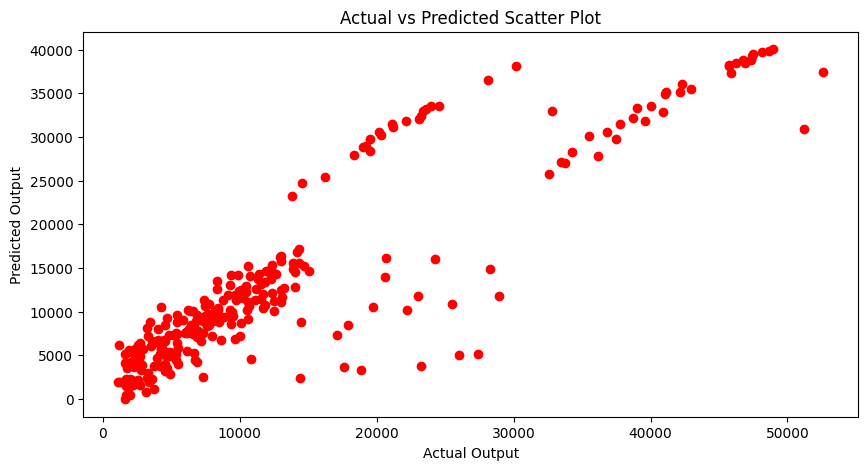

In [89]:
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual vs Predicted Scatter Plot')
plt.show()